In [75]:
import numpy as np # manip des arrays (tableaux)
import pandas as pd # manip des dataframes
import matplotlib.pyplot as plt # construct des graphes : barplot, cammenberts
import seaborn as sns

# 1. Exploration des données

## 1.1. Importation des données de train et de test

In [76]:
# import train data
train_original_df = pd.read_csv("data_csv/train.csv")
train_original_df.head()
#train_original_df.describe()
len(train_original_df)

381109

In [77]:
# import test data
test_original_df = pd.read_csv("data_csv/test.csv")

In [78]:
# Affichage des premiers lignes
test_original_df.head()
#len(test_original_df)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [79]:
# Affichage des dernieres lignes
test_original_df.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
127032,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56
127033,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165
127034,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74
127035,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265
127036,508146,Male,41,1,29.0,1,1-2 Year,No,27927.0,124.0,231


In [80]:
# Description de nos données
test_original_df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
count,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000
mean,444628.000000,38.765903,0.998134,26.459866,0.460039,30524.643576,111.800468,154.318301
std,36672.567411,15.465814,0.043152,13.209916,0.498403,16945.297103,54.371765,83.661588
min,381110.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000
25%,412869.000000,25.000000,1.000000,15.000000,0.000000,24325.000000,26.000000,82.000000
50%,444628.000000,36.000000,1.000000,28.000000,0.000000,31642.000000,135.000000,154.000000
75%,476387.000000,49.000000,1.000000,35.000000,1.000000,39408.000000,152.000000,227.000000
max,508146.000000,85.000000,1.000000,52.000000,1.000000,472042.000000,163.000000,299.000000


## 1.2. Les statistiques des données (Repésentation graphique)

<AxesSubplot:title={'center':'test Gender'}, xlabel='Gender'>

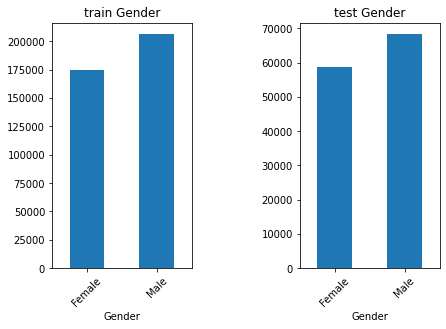

In [81]:
# La colonne 'Gender'
origin_train_gender_graph = train_original_df.groupby(['Gender'])['Gender'].count()
origin_test_gender_graph = test_original_df.groupby(['Gender'])['Gender'].count()
plt.subplot(121)
plt.tight_layout(w_pad=10.0)
origin_train_gender_graph.plot(kind = 'bar', rot=45, title="train Gender")
plt.subplot(122)
origin_test_gender_graph.plot(kind = 'bar', rot=45, title="test Gender")

<AxesSubplot:title={'center':'test Vehicle_Age'}, xlabel='Vehicle_Age'>

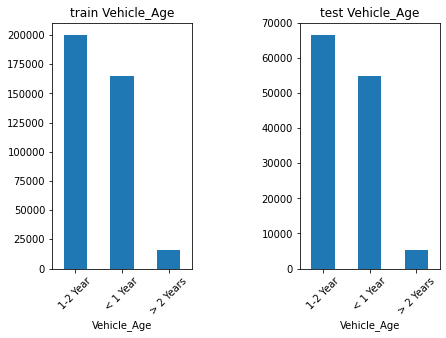

In [82]:
# La colonne 'Vehicle_Age'
origin_train_vehicleAge_graph = train_original_df.groupby(['Vehicle_Age'])['Vehicle_Age'].count()
origin_test_vehicleAge_graph = test_original_df.groupby(['Vehicle_Age'])['Vehicle_Age'].count()
plt.subplot(121)
plt.tight_layout(w_pad=10.0)
origin_train_vehicleAge_graph.plot(kind = 'bar', rot=45, title="train Vehicle_Age")
plt.subplot(122)
origin_test_vehicleAge_graph.plot(kind = 'bar', rot=45, title="test Vehicle_Age")

# 2. Pre-Processing

## 2.1. Elimination des colonnes inutiles

In [83]:
 # eliminer la colonne 'id' du train_original_df
train_original_df = train_original_df.drop(['id'], axis=1)

In [84]:
# eliminer la colonne 'id' du test_original_df
test_original_df = test_original_df.drop(['id'], axis=1)

## 2.2. Vérification d'existance de valeurs null

In [85]:
# Vérifier si on a des valeur null dans train_original_df
train_original_df.isnull().sum() # retourne la somme des valeurs nulles dans chaque colonne du dataframe

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [86]:
# Vérifier si on a des valeur null dans test_original_df
test_original_df.isnull().sum() # retourne la somme des valeurs nulles dans chaque colonne du dataframe

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

## 2.3. Encoding (transformer les valeurs string en valeurs numériques)

In [87]:
train_encoded_df = train_original_df
test_encoded_df = test_original_df

In [88]:
from sklearn.preprocessing import LabelEncoder
def toEncodeData(df, colomn):
    le = LabelEncoder()
    le.fit(df[colomn]) # détecter les classes
    print(le.classes_) # afficher les classes sous forme d'une liste
    df[colomn] = le.transform(df[colomn]) # transformer les classes (toutes les valeurs string) en valeurs numériques

In [89]:
# Encoder la colonne 'Gender'
toEncodeData(train_encoded_df, 'Gender')
toEncodeData(test_encoded_df, 'Gender')

['Female' 'Male']
['Female' 'Male']


In [90]:
# Encoder la colonne 'Gender'
toEncodeData(train_encoded_df, 'Vehicle_Age')
toEncodeData(test_encoded_df, 'Vehicle_Age')

['1-2 Year' '< 1 Year' '> 2 Years']
['1-2 Year' '< 1 Year' '> 2 Years']


In [91]:
# Encoder la colonne 'Vehicle_Damage'
toEncodeData(train_encoded_df, 'Vehicle_Damage')
toEncodeData(test_encoded_df, 'Vehicle_Damage')

['No' 'Yes']
['No' 'Yes']


In [92]:
#train_encoded_df.head()
train_encoded_df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


# 3. Entraîner un model de classification

## 3.1. Choix de l'algorithme

In [93]:
from sklearn.neighbors import KNeighborsClassifier
# initialiser notre model
modelKnn = KNeighborsClassifier(n_neighbors=1)

## 3.2. Préparation de tableau numpy x et y

In [94]:
""" pour entrainer un model, il faut qu'on aura 2 tableuax numpy,
    mais dans notre dataset on 'a q'un seul tableau pendas ==> donc on doit creer les 2 tableau numpy telque:
    Y: représente la colonne 'Response'
    X: représente le reste (toute les colonnes sauf 'Response') 
    *** X, Y ne sont pas des tableaux numpy, sont des dataframes, sachant que pendas est construit sur la base de numpy
        donc on passe ces 2 tableau à 'scikit-learn' et tous va bien se passé ***
"""

" pour entrainer un model, il faut qu'on aura 2 tableuax numpy,\n    mais dans notre dataset on 'a q'un seul tableau pendas ==> donc on doit creer les 2 tableau numpy telque:\n    Y: représente la colonne 'Response'\n    X: représente le reste (toute les colonnes sauf 'Response') \n    *** X, Y ne sont pas des tableaux numpy, sont des dataframes, sachant que pendas est construit sur la base de numpy\n        donc on passe ces 2 tableau à 'scikit-learn' et tous va bien se passé ***\n"

In [95]:
# préparer les tableau X et Y
y = train_encoded_df['Response'].to_numpy()
X = train_encoded_df.drop('Response', axis=1).to_numpy() # eliminer la colonne 'Response'

## 3.3. Spliter la data

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, test_size=0.2)

In [97]:
print(X_train.shape)
print(X_test.shape)

(304887, 10)
(76222, 10)


## 3.3. Entraîner notre model

In [98]:
modelKnn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

# 4. Évaluer la performance de notre model

In [99]:
modelKnn.score(X_test, y_test)

0.7978273989136995

# 5. Prédiction

In [100]:
def interested(gender, age, driving_license, region_code, previously_insured, vehicle_age, vehicle_damage, annual_premium, policy_sales_channel, vintage):
    x_predict = np.array([
        gender, age, driving_license, region_code, previously_insured, vehicle_age, vehicle_damage, annual_premium, policy_sales_channel, vintage
    ]).reshape(1, 10)
    predictClass = modelKnn.predict(x_predict) # pédicri à quelle classe (intérissé ou non)
    probaPredict = modelKnn.predict_proba(x_predict) # la probabilité d'être intérissé ou non
    return (predictClass, probaPredict)

# 6. Tester le modèle

In [101]:
print(interested(1, 74, 1, 11.0, 1, 2, 1, 35786.0, 152.0, 53))

(array([0]), array([[1., 0.]]))


# 7. Améliorer la perfermance du modèle avec cross validation

In [102]:
from sklearn.model_selection import cross_val_score
def getAvgCrossK(k, x_data, y_data):
    return cross_val_score(KNeighborsClassifier(k), x_data, y_data, cv=5, scoring='accuracy').mean()

In [103]:
k_value = [1, 3, 5, 7, 10, 15, 18, 35, 60, 100]
trainScoreValue = []
testScoreValue = []
for i in k_value:
    trainScoreValue.append(getAvgCrossK(i, X_train, y_train))
    testScoreValue.append(getAvgCrossK(i, X_test, y_test))

In [107]:
print(trainScoreValue)

[0.7982826370082163, 0.8419742330101185, 0.8579834458530617, 0.8661832054313914, 0.8750914262211005, 0.8758458048794455, 0.8768953737952188, 0.8771249675384734, 0.8771348073141265, 0.8771348073141265]


In [108]:
print(testScoreValue)

[0.7993230329872297, 0.8472619341966287, 0.8635957898882239, 0.8707459685626329, 0.8773188872830964, 0.8778436658517028, 0.8785258851339087, 0.8786439609357837, 0.8786439609357837, 0.8786439609357837]


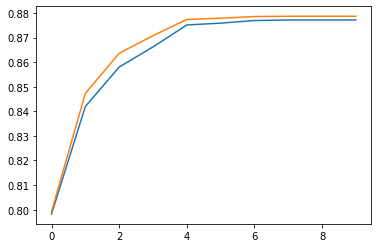

In [110]:
plt.plot(trainScoreValue)
plt.plot(testScoreValue)